# ML project (cancer dataset)

`Second ml project working on cancer dataset`

i will try to make the best results to this model :)



### ``Most important libraries``

In [1]:
## Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## other
import missingno
import os

## Model Selection
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import mean_squared_error, r2_score

## Preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn_features.transformers import DataFrameSelector

## Models
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn_features.transformers import DataFrameSelector

### Load the Data and Look at the big picture


In [2]:
## Read the csv file using pandas
file_path = os.path.join(os.getcwd(), 'survey lung cancer.csv')
df_cancer = pd.read_csv(file_path)

## show the head of the DF
df_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
## check the info (nulls and datatypes)
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
cols_list = list(df_cancer.columns)
cols_list

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

<AxesSubplot:>

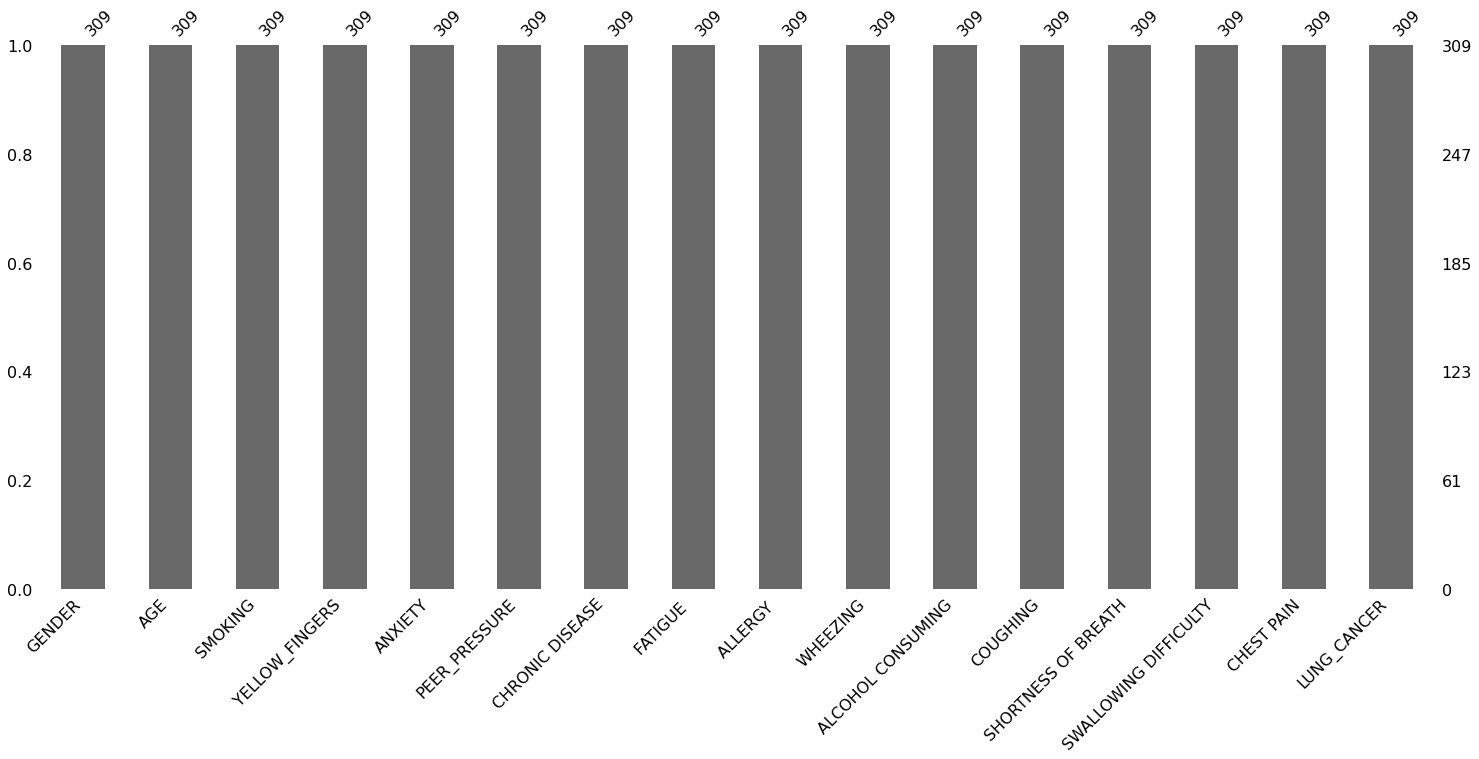

In [5]:
## check nulls in the data
missingno.bar(df_cancer)

<AxesSubplot:>

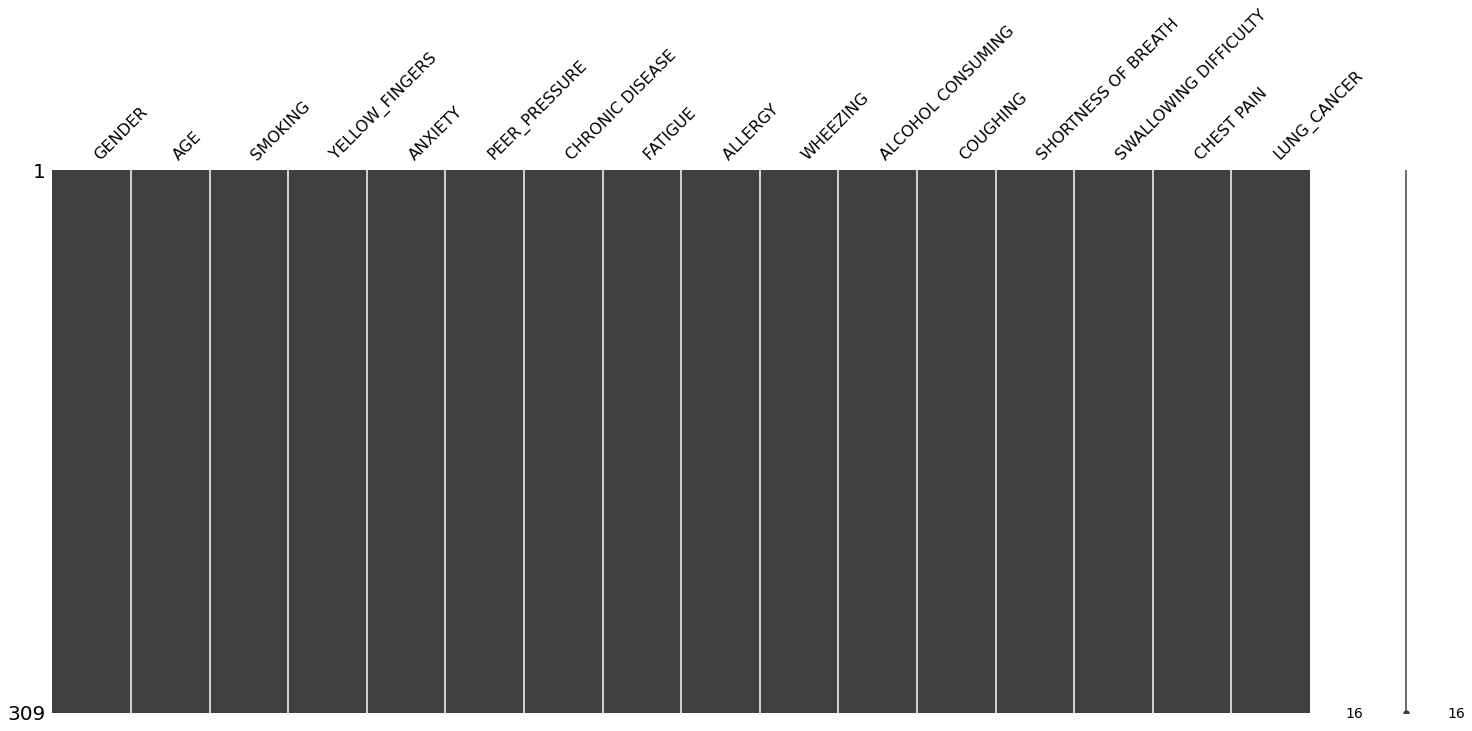

In [6]:
missingno.matrix(df_cancer)

* `Comment: It seems that Dataset is a contains 309 instances and has no null values, and also all datatypes is int64 as they are continuous numerical features except the (GENDER and LUNG_CANCER) column which is nominal categorical Feature`

In [7]:
## some statistics of the DF --> target column is (LUNG_CANCER)
df_cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
df_cancer.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

* comment: `it seems that the dataset has no null values`

## Exploratory Data Analysis (EDA)
### `Univariate Visualization`

GENDER values -->
 M    162
F    147
Name: GENDER, dtype: int64
********************************************************************************


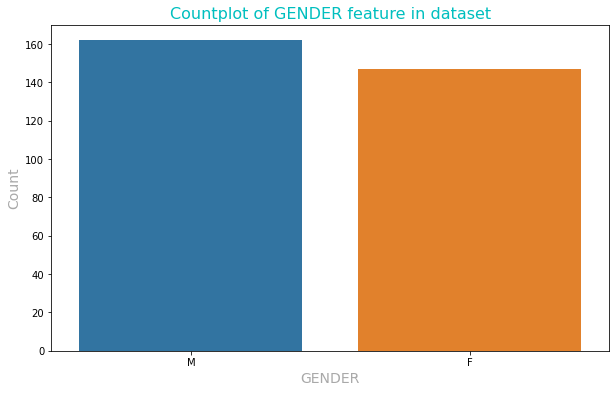

M -->  52.43%
F -->  47.57%


In [9]:
## Check the Distribution of (GENDER) Feature in Dataset
gender_values = df_cancer['GENDER'].value_counts()
print('GENDER values -->\n', gender_values)
print('**'*40)

## plotting this features
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', data=df_cancer, order=gender_values.index)
plt.title('Countplot of GENDER feature in dataset', fontsize=16, c='c')
plt.xlabel('GENDER', fontsize=14, c='darkgray')
plt.ylabel('Count', fontsize=14, c='darkgray')
plt.show()

## showing the percenatge
count = gender_values[0]
strt='{:0.2f}%'.format(100*count / df_cancer.shape[0])
print('M --> ', strt)

count = gender_values[1]
strt='{:0.2f}%'.format(100*count / df_cancer.shape[0])
print('F --> ', strt)

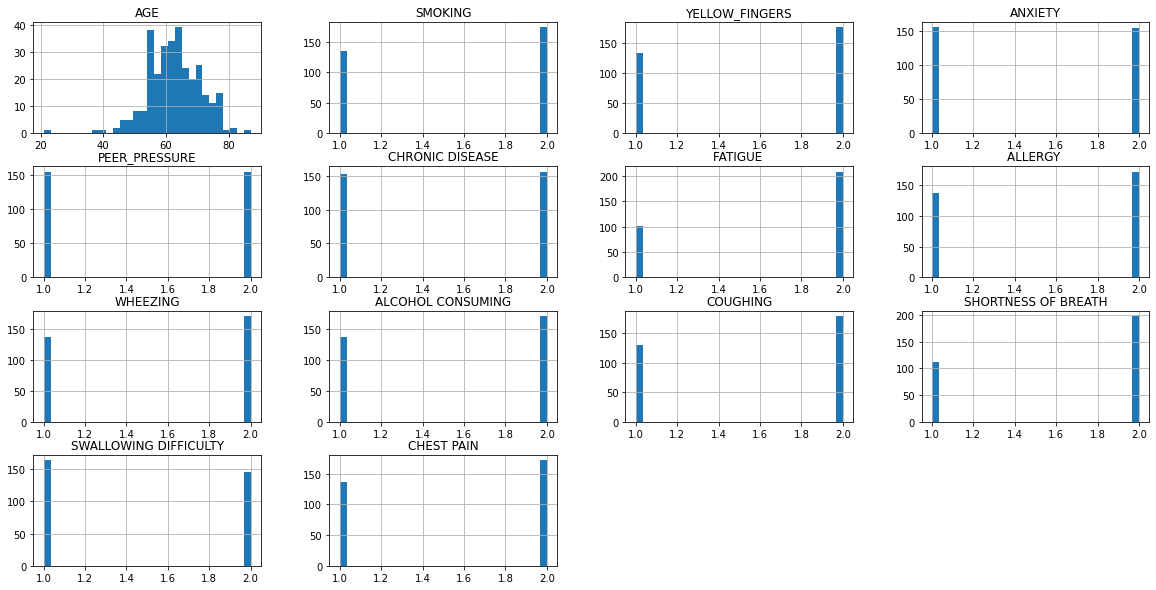

In [10]:
## Histogram Distribution of Numerical Variables in Dataset --> only numerical values
df_cancer.hist(bins=30, figsize=(20,10))
plt.show()

## Split the Dataset
### note: `I will split the Dataset using ordinary method (random method) not (Stratified method)`

In [11]:
## Split the Whole dataset to features and target
X = df_cancer.drop(['LUNG_CANCER'], axis=1)
y = df_cancer['LUNG_CANCER']

In [12]:
## Random split the dataset to three sets (train_set, valid_set, test_set)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=123, shuffle=True)
## there will convert y to labeled
lbl_encoder = LabelEncoder()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, test_size=0.15, random_state=123, shuffle=True)

## there will convert y to labeled
lbl_encoder = LabelEncoder()
y_train = lbl_encoder.fit_transform(y_train)
y_valid = lbl_encoder.fit_transform(y_valid)
y_test = lbl_encoder.fit_transform(y_test)

## check shape
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_valid shape -- ', X_valid.shape)
print('y_valid shape -- ', y_valid.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (222, 15)
y_train shape --  (222,)
X_valid shape --  (40, 15)
y_valid shape --  (40,)
X_test shape --  (47, 15)
y_test shape --  (47,)


## Dealing with nulls

In [13]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in  X_train.columns 
             if X_train[col].dtype in ['float64', 'int64']]

categ_cols = [col for col in  X_train.columns 
                if X_train[col].dtype not in ['float64', 'int64']]

print('Numerical Columns : \n', num_cols)
print('**'*30)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
************************************************************
Categorical Columns : 
 ['GENDER']


In [14]:
## I choose to impute the nulls with median --> using SimpleImputer
imputer = SimpleImputer(strategy='median')  ## define an instance

## fit and transform to training data (only Numerical)
X_train_filled = imputer.fit_transform(X_train[num_cols])

## transform valid and test datasets
X_valid_filled = imputer.transform(X_valid[num_cols])
X_test_filled = imputer.transform(X_test[num_cols])

## Standardize the Dataset

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_filled)
X_valid_scaled = scaler.transform(X_valid_filled)
X_test_scaled = scaler.transform(X_test_filled)

## Pipeline for Categorical Features -- I will use it in this Project
Use OHE -> it is preferable to use OHE when encoding for Features, But if you are encoding the Target, you MUST encode using LabelEncoder, except in Deep Learning we can use OHE for target, but for now, you can use LabelEncoder or OrdinalEncoder or OneHotEncoder for Features and only LabelEncoder for target --- take care of this Note

In [16]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                ('num_pip', num_pipeline),
                                ('categ_pipeline', categ_pipeline)])

## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_valid_final = total_pipeline.transform(X_valid)
X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

## Building ML Models

* `Evaluation Metric: RMSE`

## Lnear Regression algorithm: 

In [17]:
lin_reg = LinearRegression()

lin_reg.fit(X_train_final, y_train) 

LinearRegression()

In [18]:
## prediction
y_pred_train_lin = lin_reg.predict(X_train_final)  ## predict the training data
y_pred_valid_lin = lin_reg.predict(X_valid_final)  ## predict the training data

## RMSE
rmse_train_lin = (mean_squared_error(y_train, y_pred_train_lin))**0.5
rmse_valid_lin = (mean_squared_error(y_valid, y_pred_valid_lin))**0.5

## R2 score
r2_train_lin = r2_score(y_train, y_pred_train_lin)
r2_valid_lin = r2_score(y_valid, y_pred_valid_lin)


print(f'RMSE for training set using LinearRegression -- {rmse_train_lin:.3f}')
print(f'RMSE for validating set using LinearRegression -- {rmse_valid_lin:.3f}')   
print('**'*40)
print(f'R2 Score for training set using LinearRegression -- {r2_train_lin:.3f}')
print(f'R2 Score for validating set using LinearRegression -- {r2_valid_lin:.3f}')

## not bad in the error but r2_score not the best

RMSE for training set using LinearRegression -- 0.266
RMSE for validating set using LinearRegression -- 0.212
********************************************************************************
R2 Score for training set using LinearRegression -- 0.409
R2 Score for validating set using LinearRegression -- 0.349


## SGDRegressor:

In [19]:
sgd_reg = SGDRegressor(penalty=None, eta0=0.04, shuffle=True, max_iter=10000)
sgd_reg.fit(X_train_final, y_train)

SGDRegressor(eta0=0.04, max_iter=10000, penalty=None)

In [20]:
## prediction
y_pred_train_sgd = sgd_reg.predict(X_train_final)  ## predict the training data
y_pred_valid_sgd = sgd_reg.predict(X_valid_final)  ## predict the training data

## RMSE
rmse_train_sgd = (mean_squared_error(y_train, y_pred_train_sgd))**0.5
rmse_valid_sgd = (mean_squared_error(y_valid, y_pred_valid_sgd))**0.5

## R2 score
r2_train_sgd = r2_score(y_train, y_pred_train_sgd)
r2_valid_sgd = r2_score(y_valid, y_pred_valid_sgd)


print(f'RMSE for training set using SGDRegression -- {rmse_train_sgd:.3f}')
print(f'RMSE for validating set using SGDRegression -- {rmse_valid_sgd:.3f}')   
print('**'*40)
print(f'R2 Score for training set using SGDRegression -- {r2_train_sgd:.3f}')
print(f'R2 Score for validating set using SGDRegression -- {r2_valid_sgd:.3f}')         ## not bad 

RMSE for training set using SGDRegression -- 0.268
RMSE for validating set using SGDRegression -- 0.222
********************************************************************************
R2 Score for training set using SGDRegression -- 0.403
R2 Score for validating set using SGDRegression -- 0.292


In [21]:
results = pd.DataFrame()   #creating an empty data frame
results

""


In [22]:
tempResults = pd.DataFrame({'Algorithm':['Lnear Regression'], 'Accuracy':0.266})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Lnear Regression,0.266


In [23]:
tempResults = pd.DataFrame({'Algorithm':['SGDRegressor'], 'Accuracy':[0.268]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Lnear Regression,0.266
0,SGDRegressor,0.268


### Conclusion

Thus, we employed 2 Machine Learning Algorithms on the same data set and obtained the result that Lnear Regression method and SGDRegressor method has the same results.